In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from util import computeFeatureImportance
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

In [3]:
n_clusters = 4
train_size = 0.8

In [4]:
# ------ Data import ------ #

print("Importing data...")
x = pd.read_csv(r'Data Gathering and Preprocessing/features_Walking_scaled.csv')
print("Data imported")
print(f"Shape of data: {x.shape}")

# ------ train, test split ------ #

print("Splitting data into train and test...")
train, test = train_test_split(x, train_size=train_size)

# ------ x, y split ------ #

print("Splitting data into x and y...")
le = LabelEncoder()
le.fit(train["label"])
print(f"Classes: {le.classes_}")

y_train = le.transform(train["label"])
x_train = train.copy()
x_train = x_train.drop(["label", "time", "ID"], axis=1)

y_test = le.transform(test["label"])
x_test = test.copy()
x_test = x_test.drop(["label", "time", "ID"], axis=1)

Importing data...
Data imported
Shape of data: (3290, 27)
Splitting data into train and test...
Splitting data into x and y...
Classes: ['running' 'stairs_down' 'stairs_up' 'walking']


In [7]:

print("starting kmeans...")
# ------ PCA ------ #

print("Using PCA...")
pca = PCA(2)
df = pca.fit_transform(x_train)
df_test = pca.fit_transform(x_test)

x_train_pca = np.array(df)
x_test_pca = np.array(df_test)

# ------ Training KMeans ------ #

print("Training KMeans...")
model = KMeans(n_clusters=n_clusters)
model.fit(x_train)
label = model.labels_
# print(label)

pred_y = model.predict(x_test)
print(f"KMeans accuracy: {accuracy_score(y_test, pred_y)}")

model = KMeans(n_clusters=n_clusters)
model.fit(df)
label = model.labels_

# ------ centroid ------ #

print("Calculating centroids...")
centroids = model.cluster_centers_
u_labels = np.unique(label)

cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'brown', 5: 'purple', 6: 'orange', 7: 'pink'}
ldict = {}
for i in range(len(u_labels)):
    ldict[i] = le.classes_[i]
    
print("predicting...")
pred = model.predict(df_test)
print("Done")

starting kmeans...
Using PCA...
Training KMeans...
KMeans accuracy: 0.0
Calculating centroids...
predicting...
Done


Plotting model and test data...


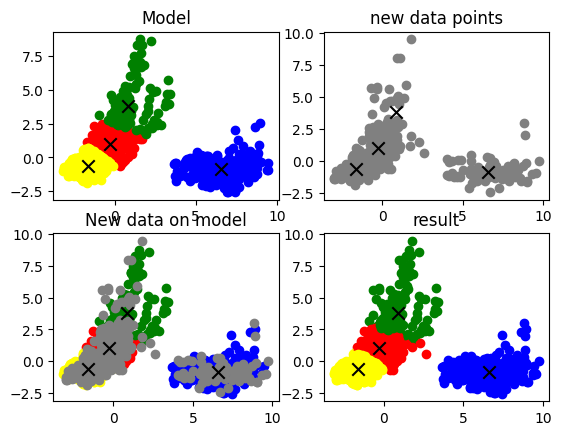

plotting model vs actual...


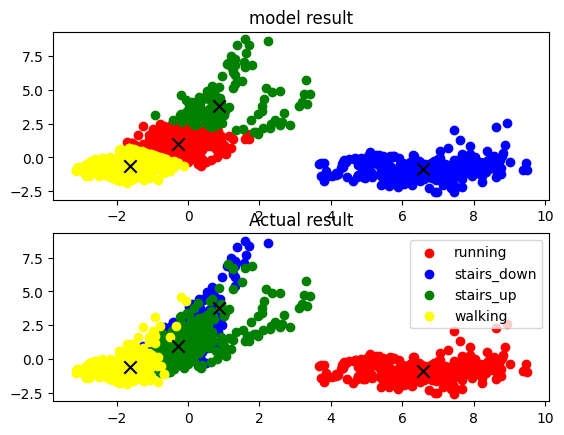

In [10]:
# ------ plot ------ #
# for i, data in enumerate(x):
#     print(f"{data[0]=}, {data[1]=}, {label[i]=}")
#     plt.scatter(data[0], data[1], label=label[i])

print("Plotting model and test data...")

fig, axs = plt.subplots(2, 2)

axs[0, 0].title.set_text('Model')
for l in u_labels:
    ii = np.where(label == l)
    axs[0, 0].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
# axs[0, 0].scatter(df[:, 0], df[:, 1], c=label)

axs[0, 0].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

# ------ prediction test data ------ #
# Make predictions on the test data

axs[0, 1].title.set_text('new data points')
axs[0, 1].scatter(df_test[:, :1], df_test[:, 1:], c='grey')
axs[0, 1].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

# create second plot which show new points whichout prediction
axs[1, 0].title.set_text('New data on model')
for l in u_labels:
    ii = np.where(label == l)
    axs[1, 0].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
axs[1, 0].scatter(df_test[:, :1], df_test[:, 1:], c='grey')
axs[1, 0].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

# create third plot which show the predictions of the new points
axs[1, 1].title.set_text('result')
for l in u_labels:
    ii = np.where(label == l)
    axs[1, 1].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
for l in u_labels:
    ii = np.where(pred == l)
    axs[1, 1].scatter(x_test_pca[ii, 0], x_test_pca[ii, 1], c=cdict[l])
axs[1, 1].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')
plt.show()

print("plotting model vs actual...")
fig, axs = plt.subplots(2)
axs[0].title.set_text('model result')
for l in u_labels:
    ii = np.where(label == l)
    axs[0].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
axs[0].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

axs[1].title.set_text('Actual result')
for l in u_labels:
    ii = np.where(y_train == l)
    axs[1].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
axs[1].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')
axs[1].legend()
plt.show()